In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes = True)  #sets nice background color


# Importing the dataset

In [2]:
zom = pd.read_csv('zomato.csv')

In [3]:
zom.head()

#Getting the 1st 5 rows of the dataset

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
zom.shape

#There are around 51k rows and 17 columns 

(51717, 17)

# EDA and cleaning of data

In [5]:
zom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [6]:
zom.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


#### Therefore average number of votes for the restaurants is around 283.

In [7]:
#Removing the Duplicates
zom.duplicated().sum()
zom.drop_duplicates(inplace=True)

In [8]:
#dropping irrelevant columns
zom=zom.drop(['url','address','phone','dish_liked', 'menu_item', 'reviews_list'],axis=1) 
zom.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [9]:
pd.DataFrame( zom.isnull().sum(), columns= ['Number of missing values'])

,Number of missing values
name,0
online_order,0
book_table,0
rate,7775
votes,0
location,21
rest_type,227
cuisines,45
approx_cost(for two people),346
listed_in(type),0


In [10]:
zom['rate'].value_counts()

NEW       2208
3.9/5     2098
3.8/5     2022
3.7/5     2011
3.9 /5    1874
          ... 
2.0 /5       7
2.2 /5       7
2.0/5        4
1.8 /5       3
1.8/5        2
Name: rate, Length: 64, dtype: int64

In [11]:
zom['rate'].unique()


array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [12]:
zom = zom.loc[zom.rate !='NEW']
zom = zom.loc[zom.rate !='-'].reset_index(drop=True)
remove_denom = lambda x: x.replace('/5', '') if type(x) == np.str else x
zom.rate = zom.rate.apply(remove_denom).str.strip().astype('float')
zom['rate'].head()

<ipython-input-12-94204308bdc5>:3: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  remove_denom = lambda x: x.replace('/5', '') if type(x) == np.str else x


0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [13]:
zom["rate"] = zom["rate"].fillna(zom["rate"].median())


In [14]:
pd.DataFrame( zom.isnull().sum(), columns= ['Number of missing values'])

# All missing values from rate is gone

,Number of missing values
name,0
online_order,0
book_table,0
rate,0
votes,0
location,21
rest_type,225
cuisines,45
approx_cost(for two people),341
listed_in(type),0


In [15]:
zom['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '1,100', '1,600', '230',
       '130', '80', '50', '190', '1,700', nan, '180', '1,350', '2,200',
       '1,400', '2,000', '1,800', '1,900', '330', '2,500', '2,100',
       '3,000', '2,800', '3,400', '40', '1,250', '3,500', '4,000',
       '2,400', '2,600', '120', '1,450', '469', '70', '3,200', '60',
       '240', '6,000', '1,050', '2,300', '4,100', '5,000', '3,700',
       '1,650', '2,700', '4,500', '140', '360'], dtype=object)

In [16]:
zom['approx_cost(for two people)'] = zom['approx_cost(for two people)'].astype(str)
zom['approx_cost(for two people)'] = zom['approx_cost(for two people)'].apply(lambda x: x.replace(',',''))
zom['approx_cost(for two people)'] = zom['approx_cost(for two people)'].astype(float)
zom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49440 entries, 0 to 49439
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         49440 non-null  object 
 1   online_order                 49440 non-null  object 
 2   book_table                   49440 non-null  object 
 3   rate                         49440 non-null  float64
 4   votes                        49440 non-null  int64  
 5   location                     49419 non-null  object 
 6   rest_type                    49215 non-null  object 
 7   cuisines                     49395 non-null  object 
 8   approx_cost(for two people)  49099 non-null  float64
 9   listed_in(type)              49440 non-null  object 
 10  listed_in(city)              49440 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 4.1+ MB


In [17]:
zom['approx_cost(for two people)'].unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199., 1100., 1600.,  230.,  130.,
         80.,   50.,  190., 1700.,   nan,  180., 1350., 2200., 1400.,
       2000., 1800., 1900.,  330., 2500., 2100., 3000., 2800., 3400.,
         40., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,  469.,
         70., 3200.,   60.,  240., 6000., 1050., 2300., 4100., 5000.,
       3700., 1650., 2700., 4500.,  140.,  360.])

In [18]:
zom["approx_cost(for two people)"] = zom["approx_cost(for two people)"].fillna(zom["approx_cost(for two people)"].median())


In [19]:
pd.DataFrame( zom.isnull().sum(), columns= ['Number of missing values'])

#Filled NaN values in cost for two peopel column as well

,Number of missing values
name,0
online_order,0
book_table,0
rate,0
votes,0
location,21
rest_type,225
cuisines,45
approx_cost(for two people),0
listed_in(type),0


In [20]:
zom["location"] = zom['location'].fillna(zom["location"].mode().iloc[0])
zom["rest_type"] = zom["rest_type"].fillna(zom["rest_type"].mode().iloc[0])
zom["cuisines"] = zom["cuisines"].fillna(zom["cuisines"].mode().iloc[0])


#May have contrasting inputs but best for data to be filled with mode.

In [21]:
pd.DataFrame( zom.isnull().sum(), columns= ['Number of missing values'])


,Number of missing values
name,0
online_order,0
book_table,0
rate,0
votes,0
location,0
rest_type,0
cuisines,0
approx_cost(for two people),0
listed_in(type),0


In [22]:
#### We have eliminated all the null values and filled with approriate values

In [23]:
zom.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet,Banashankari


# Visualization

### Top 5 popular localities

In [24]:
top_5_loc = zom.location.value_counts().nlargest(5)

<AxesSubplot:>

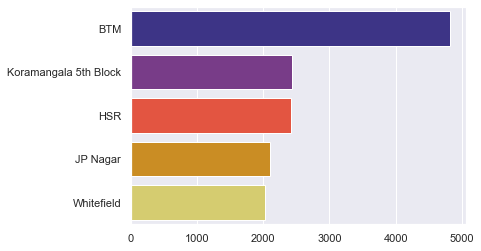

In [25]:
sns.barplot(y=top_5_loc.index, x=top_5_loc.values, palette="CMRmap")

### BTM seems to be the most popular locality in BTM for restaurants

### Top 5 famous Restaurant types

In [26]:
top_5_rest = zom.rest_type.value_counts().nlargest(5)

<AxesSubplot:>

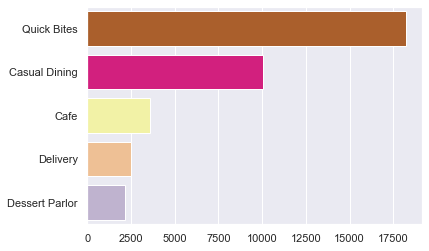

In [27]:
sns.barplot(y=top_5_rest.index, x=top_5_rest.values, palette="Accent_r")

### Quick bites type of restaurants seem to be the most famous

# Top 5 cuisine options 

In [28]:
top_5_cui = zom.cuisines.value_counts().nlargest(5)

<AxesSubplot:>

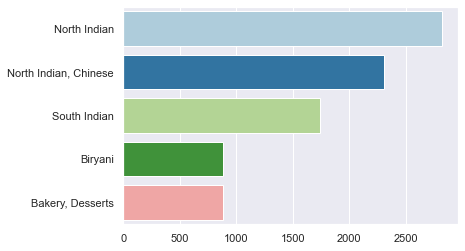

In [29]:
sns.barplot(y=top_5_cui.index, x=top_5_cui.values, palette="Paired")

### North indian seems to be the most popular cuisine

# Restuarants with most outlets

In [30]:
top_5_res = zom.name.value_counts().nlargest(5)

<AxesSubplot:>

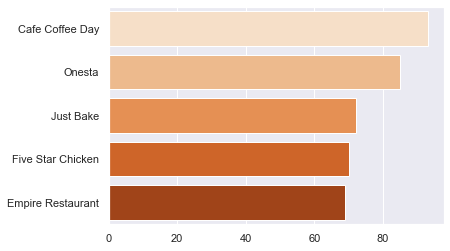

In [31]:
sns.barplot(y=top_5_res.index, x=top_5_res.values, palette="Oranges")

### Cafe coffee day has the maximum number of outlets in Bangalore

<AxesSubplot:ylabel='book_table'>

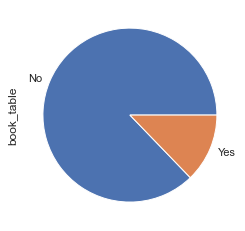

In [32]:
zom.book_table.value_counts().plot(kind='pie')

### Many restaurants don't require their customers to book a table in advance

<AxesSubplot:ylabel='online_order'>

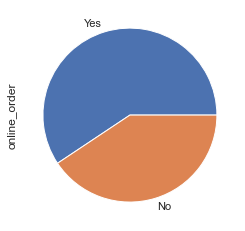

In [33]:

zom.online_order.value_counts().plot(kind='pie')

### Most of the outlets have the option where customers can order food online as well.

# Visualising relation btw online order and ratings

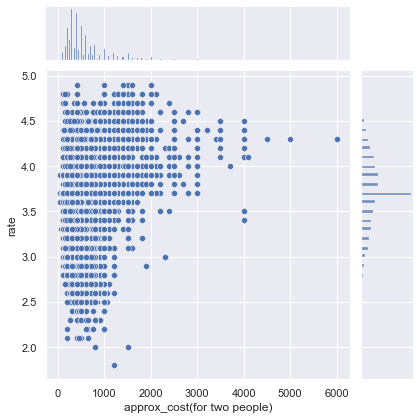

In [34]:
sns.jointplot(data=zom, x="approx_cost(for two people)", y="rate")

#### There doesn't seem to be a relation between cost and ratings of a restaurant. On the contarty, one may beliee that an expensive restaurant will have higher ratings.

In [35]:
zom.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'cuisines', 'approx_cost(for two people)',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [36]:
zom.rest_type.value_counts()

Quick Bites                   18228
Casual Dining                 10066
Cafe                           3610
Delivery                       2493
Dessert Parlor                 2188
                              ...  
Bakery, Food Court                2
Pop Up                            2
Dessert Parlor, Kiosk             2
Quick Bites, Kiosk                1
Sweet Shop, Dessert Parlor        1
Name: rest_type, Length: 93, dtype: int64

# Model building

In [37]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()

zom['online_order'] = lb_make.fit_transform(zom['online_order'])
zom['book_table'] = lb_make.fit_transform(zom['book_table'])
zom['location'] = lb_make.fit_transform(zom['location'])
zom['rest_type'] = lb_make.fit_transform(zom['rest_type'])
zom['cuisines'] = lb_make.fit_transform(zom['cuisines'])
zom['listed_in(type)'] = lb_make.fit_transform(zom['listed_in(type)'])



# zom = pd.get_dummies(zom, columns = ['online_order', 'book_table', 'location', 'rest_type', 
#  'cuisines', 'listed_in(type)'], dtype=np.int64)

In [38]:
zom.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,1,1,4.1,775,1,27,2091,800.0,0,Banashankari
1,Spice Elephant,1,0,4.1,787,1,27,922,800.0,0,Banashankari
2,San Churro Cafe,1,0,3.8,918,1,22,743,800.0,0,Banashankari
3,Addhuri Udupi Bhojana,0,0,3.7,88,1,78,2469,300.0,0,Banashankari
4,Grand Village,0,0,3.8,166,4,27,2119,600.0,0,Banashankari


In [39]:
X= zom.drop(labels=['name', 'rate', 'listed_in(city)'], axis=1)
y = zom[['rate']]
X.head()

,online_order,book_table,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type)
0,1,1,775,1,27,2091,800.0,0
1,1,0,787,1,27,922,800.0,0
2,1,0,918,1,22,743,800.0,0
3,0,0,88,1,78,2469,300.0,0
4,0,0,166,4,27,2119,600.0,0


In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


model = LinearRegression()

model.fit(X_train,y_train)

y_pred=model.predict(X_test)


In [44]:
print('Accuracy prediction for Linear Regression model :', r2_score(y_test,y_pred))


Accuracy prediction for Linear Regression model : 0.26379412506266575


In [45]:
from sklearn.ensemble import RandomForestRegressor


# tuning=dict()
rf=RandomForestRegressor(n_estimators=200,random_state=50,min_samples_leaf=.00001)
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
r2_score(y_test,y_pred)

<ipython-input-45-51db6ebf2db2>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


0.9343511094277559

In [47]:
from xgboost import XGBRegressor

xgb = XGBRegressor(booster = 'gbtree', learning_rate = 0.1, max_depth = 15, n_estimators = 200)
xgb.fit(X_train, y_train)
y_predict=xgb.predict(X_test)

r2_score(y_test,y_predict)

0.9459173588947778

# Out of the three models, XGBoost seems to be the best model with highest r2 score.

In [48]:
X.head()

,online_order,book_table,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type)
0,1,1,775,1,27,2091,800.0,0
1,1,0,787,1,27,922,800.0,0
2,1,0,918,1,22,743,800.0,0
3,0,0,88,1,78,2469,300.0,0
4,0,0,166,4,27,2119,600.0,0


In [49]:
new_input = [1, 1, 920, 5, 27, 922, 500.0, 0]
rest = pd.DataFrame(new_input)
rest.T

y_pred_new=xgb.predict(rest.T)

print('The new restaurant type is predicted to have a rating of -> ',y_pred_new)


The new restaurant type is predicted to have a rating of ->  [3.7477574]


# Conclusion : Using the Zomato restaurants dataset, we have explored the relations between different features like lcoation, online order, etc. Using XGB model which has the best accuracy, we have succesfully predicted the rating of a restaurant, given other parameters